# Метрические методы классификации

## Библиотеки

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


## Выборка данных

In [87]:
df = pd.read_csv('adultdataset/adult.csv',',')
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
del df['workclass']
del df['marital-status']
del df['education-num']
del df['occupation']
del df['relationship']
del df['race']
del df['sex']
del df['capital-gain']
del df['capital-loss']
del df['native-country']
df.head()

,age,fnlwgt,education,hours-per-week,income
0,50,83311,Bachelors,13,<=50K
1,38,215646,HS-grad,40,<=50K
2,53,234721,11th,40,<=50K
3,28,338409,Bachelors,40,<=50K
4,37,284582,Masters,40,<=50K


## Обработка данных

In [88]:
#Преобразование категориальных признаков в числовые
df.education.unique()
print(len(df.education.unique()))
le = LabelEncoder()
le.fit(df.education)
df['education'] = le.transform(df.education)
df.head()
# # Матричная диаграмма рассеивания
# sns.set_style("whitegrid")
# sns.pairplot(df, hue="income", height=3)
# plt.show()

16


,age,fnlwgt,education,hours-per-week,income
0,50,83311,9,13,<=50K
1,38,215646,11,40,<=50K
2,53,234721,1,40,<=50K
3,28,338409,9,40,<=50K
4,37,284582,12,40,<=50K


## Обработка отсутствующих данных

In [89]:
def countNaN(df)->int:
    c = 0
    for k,v in df.items():
        if str(df[k]).strip() == '?':
            c += 1
    all = df.count()
    if c == 0:
        return c
    return all/c

for col in df.columns:
    print('{} - {}%'.format(col,countNaN(df[col])))

age - 0%
fnlwgt - 0%
education - 0%
hours-per-week - 0%
income - 0%


## Обнаружение неинформативных признаков

In [90]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
    else:
        print("{} column It' ok!".format(col))

age column It' ok!
fnlwgt column It' ok!
education column It' ok!
hours-per-week column It' ok!
income column It' ok!


## Диаграммы для обнаружения выбросов

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

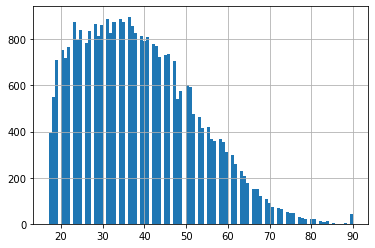

In [91]:
df['age'].hist(bins=100)
df['age'].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

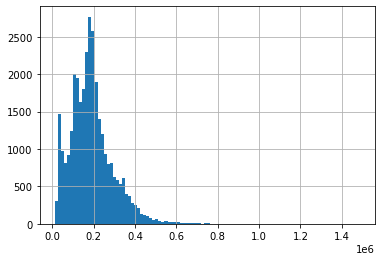

In [92]:
df['fnlwgt'].hist(bins=100)
df['fnlwgt'].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

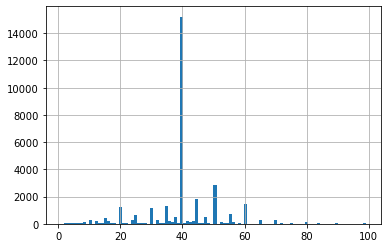

In [93]:
df['hours-per-week'].hist(bins=100)
df['hours-per-week'].describe()

## Удаление выбросов

In [94]:
copydf = df
countdfold = df.count()
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

copydf = remove_outlier(copydf,'age')
copydf = remove_outlier(copydf,'fnlwgt')
copydf = remove_outlier(copydf,'hours-per-week')

count    22748.000000
mean        38.841481
std         12.185529
min         17.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         77.000000
Name: age, dtype: float64

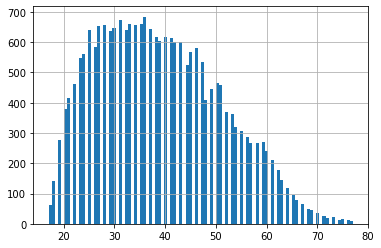

In [95]:
copydf['age'].hist(bins=100)
copydf['age'].describe()

count     22748.000000
mean     181256.910761
std       87083.590087
min       14878.000000
25%      117779.000000
50%      177073.500000
75%      230023.750000
max      416415.000000
Name: fnlwgt, dtype: float64

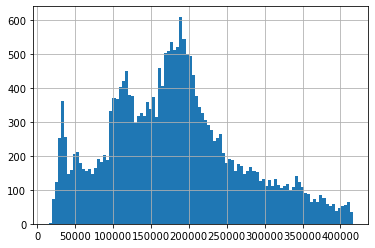

In [96]:
copydf['fnlwgt'].hist(bins=100)
copydf['fnlwgt'].describe()

count    22748.000000
mean        41.571743
std          4.019296
min         33.000000
25%         40.000000
50%         40.000000
75%         42.000000
max         52.000000
Name: hours-per-week, dtype: float64

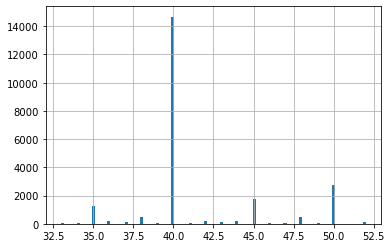

In [97]:
copydf['hours-per-week'].hist(bins=100)
copydf['hours-per-week'].describe()

In [99]:
print("Old data frames")
print(countdfold)
print("\nNew data frames")
copydf.count()

Old data frames
age               32560
fnlwgt            32560
education         32560
hours-per-week    32560
income            32560
dtype: int64

New data frames


age               22748
fnlwgt            22748
education         22748
hours-per-week    22748
income            22748
dtype: int64

In [108]:
num_features = 4
X, Y = make_classification(n_samples=22000, n_features=num_features,
                           n_informative=4, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=50,
                                                    random_state=0)
X = copydf.values[:, :3]
Y = copydf.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)



## Метод ближайшего соседа

In [109]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

Правильность на обучающей выборке : 1.00
Правильность на контрольной выборке : 0.96


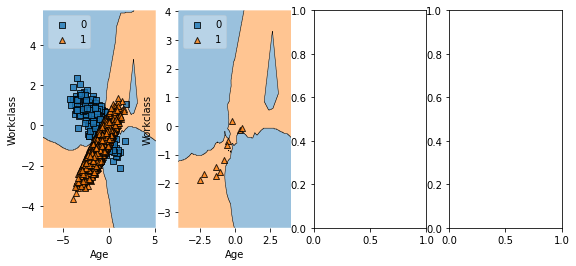

In [110]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, num_features*2)

ax = []
for i in range(num_features):
    ax.append(fig.add_subplot(gs[i]))
value=1.0
width=0.75
plot_decision_regions(X_train, Y_train, model, ax=ax[0],
                       filler_feature_values={2: value, 3:value},
                  filler_feature_ranges={2: width, 3:width},
                  legend=2)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Workclass')
print("Правильность на обучающей выборке : {:.2f}".format(model.score(X_train,Y_train)))
plot_decision_regions(X_test, Y_test, model, ax=ax[1],
                       filler_feature_values={2: value, 3:value},
                  filler_feature_ranges={2: width, 3:width},
                  legend=2)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Workclass')
print("Правильность на контрольной выборке : {:.2f}".format(model.score(X_test,Y_test)))



## Метод k-ближайших соседей

In [ ]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод k-ближайших соседей с линейно убивающими весами

In [ ]:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

In [ ]:
models = []
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                 weights=func)
    model.fit(X_train, Y_train)
    models.append(model)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i])

plt.show()

## Метод окна Парзена

In [ ]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 5.0]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()